In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import glob
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## Einlesen der Tabelle für die **Global warming levels**

Die GWL wurden mit dem Script des IPCC Atlas berechnet, es wurde lediglich die 20-Jahresmittelung auf 30 Jahre erhöht. 

In [13]:
workdir = os.getcwd()
file_gwl = "CMIP5_Atlas_WarmingLevels_30y_window.csv"
# file_gwl
dfname = os.path.join(workdir, file_gwl)
dfname

'/work/ch0636/g300047/GITHUB/climate-action-sheet-forestry/GWL_table/CMIP5_Atlas_WarmingLevels_30y_window.csv'

In [14]:
GWL_table = pd.read_csv(dfname)

In [15]:
def rename_GCM_name(df):
    print("rename GCM name")
    GCM_tab = {
        "HadGEM2-ES": "MOHC-HadGEM2-ES",
        "EC-EARTH": "ICHEC-EC-EARTH",
        "CNRM-CM5": "CNRM-CERFACS-CNRM-CM5",
        "NorESM1-M": "NCC-NorESM1-M",
        "MPI-ESM-LR": "MPI-M-MPI-ESM-LR",
        "IPSL-CM5A-MR": "IPSL-IPSL-CM5A-MR",
        "MIROC5": "MIROC-MIROC5",
        "CanESM2": "CCCma-CanESM2",
        "IPSL-CM5A-LR": "IPSL-IPSL-CM5A-LR",
        "GFDL-ESM2G": "NOAA-GFDL-GFDL-ESM2G",
    }

    df["gcm"] = df["gcm"].map(GCM_tab)

    return df

In [16]:
# Aufteilen von Globalmodell und Realisation
GWL_table.columns
tmp = GWL_table["model_run"].str.split("_")

GWL_table["gcm"] = tmp.str[0]
GWL_table["realisation"] = tmp.str[1]
GWL_table_cmip5 = GWL_table.copy()
# GWL_table_cmip5
rename_GCM_name(GWL_table)


rename GCM name


,model_run,1.5_rcp26,2_rcp26,3_rcp26,4_rcp26,1.5_rcp45,2_rcp45,3_rcp45,4_rcp45,1.5_rcp85,2_rcp85,3_rcp85,4_rcp85,gcm,realisation
0,ACCESS1-0_r1i1p1,9999.0,9999.0,9999.0,9999.0,2033.0,2054.0,NaN,NaN,2028.0,2040.0,2061.0,2081.0,NaN,r1i1p1
1,ACCESS1-3_r1i1p1,9999.0,9999.0,9999.0,9999.0,2038.0,2057.0,NaN,NaN,2031.0,2042.0,2061.0,2082.0,NaN,r1i1p1
2,bcc-csm1-1_r1i1p1,2022.0,NaN,NaN,NaN,2020.0,2043.0,NaN,NaN,2018.0,2036.0,2059.0,2083.0,NaN,r1i1p1
3,bcc-csm1-1-m_r1i1p1,2012.0,NaN,NaN,NaN,2012.0,2036.0,NaN,NaN,2011.0,2028.0,2059.0,2084.0,NaN,r1i1p1
4,BNU-ESM_r1i1p1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,r1i1p1
5,CanESM2_r1i1p1,2014.0,2033.0,NaN,NaN,2016.0,2032.0,2074.0,NaN,2013.0,2027.0,2049.0,2068.0,CCCma-CanESM2,r1i1p1
6,CCSM4_r1i1p1,2016.0,NaN,NaN,NaN,2016.0,2040.0,NaN,NaN,2013.0,2030.0,2057.0,2077.0,NaN,r1i1p1
7,CESM1-BGC_r1i1p1,9999.0,9999.0,9999.0,9999.0,2019.0,2043.0,NaN,NaN,2016.0,2033.0,2059.0,2080.0,NaN,r1i1p1
8,CMCC-CM_r1i1p1,9999.0,9999.0,9999.0,9999.0,2033.0,2050.0,NaN,NaN,2029.0,2041.0,2061.0,2078.0,NaN,r1i1p1
9,CMCC-CMS_r1i1p1,9999.0,9999.0,9999.0,9999.0,2037.0,2056.0,NaN,NaN,2030.0,2041.0,2061.0,2077.0,NaN,r1i1p1


In [7]:
GWL_table_cordex = GWL_table[GWL_table["gcm"].notna()]
GWL_table_cordex.shape

(10, 15)

#### Jetzt habe ich 2 Tabellen: 1. mit den GCMs welche bei EURO-CORDEX als Antrieb verwendet wurden und 2. eine mit allen GCMs welche im IPCC Atlas verwendet wurden. 
* GWL_table_cordex 
* GWL_table_cmip5


In [17]:
def make_dataframe(table, ens):
    # GWL_table_cordex.columns
    GWL_RCP = [
        "1.5_rcp26",
        "2_rcp26",
        "3_rcp26",
        "4_rcp26",
        "1.5_rcp45",
        "2_rcp45",
        "3_rcp45",
        "4_rcp45",
        "1.5_rcp85",
        "2_rcp85",
        "3_rcp85",
        "4_rcp85",
    ]
    list = table["model_run"].unique()

    # dft=pd.DataFrame()
    df = pd.DataFrame()

    for i in list:
        sel = table.loc[(table["model_run"] == i)]
        for c in GWL_RCP:
            temp = pd.DataFrame(
                {"model_run": i, "GWL_RCP": c.replace("_", "-GWL_"), "year": sel[c]}
            )

            df = pd.concat([df, temp])
    df["ensemble"] = ens
    df["ens_GWL_RCP"] = df["ensemble"].str.cat(df["GWL_RCP"], sep="_")
    # f['model_member_experiment_id'] = df['model_member'].str.cat(df['experiment_id'],sep="-")
    df = df.reset_index()
    del df["index"]
    return df

In [9]:
df_cordex = make_dataframe(GWL_table_cordex, ens="CORDEX")

In [10]:
df_cmip5 = make_dataframe(GWL_table_cmip5, "CMIP5")

In [18]:
def plot_gwl_years(df):
    # colors:

    my_c = {
        "CMIP5_1.5-GWL_rcp26": "tab:cyan",
        "CORDEX_1.5-GWL_rcp26": "tab:blue",
        "CMIP5_1.5-GWL_rcp45": "xkcd:lime",
        "CORDEX_1.5-GWL_rcp45": "xkcd:gold",
        "CMIP5_1.5-GWL_rcp85": "tab:pink",
        "CORDEX_1.5-GWL_rcp85": "tab:red",
        "CMIP5_2-GWL_rcp26": "tab:cyan",
        "CORDEX_2-GWL_rcp26": "tab:blue",
        "CMIP5_2-GWL_rcp45": "xkcd:lime",
        "CORDEX_2-GWL_rcp45": "xkcd:gold",
        "CMIP5_2-GWL_rcp85": "tab:pink",
        "CORDEX_2-GWL_rcp85": "tab:red",
        "CMIP5_3-GWL_rcp26": "tab:cyan",
        "CORDEX_3-GWL_rcp26": "tab:blue",
        "CMIP5_3-GWL_rcp45": "xkcd:lime",
        "CORDEX_3-GWL_rcp45": "xkcd:gold",
        "CMIP5_3-GWL_rcp85": "tab:pink",
        "CORDEX_3-GWL_rcp85": "tab:red",
        "CMIP5_4-GWL_rcp26": "tab:cyan",
        "CORDEX_4-GWL_rcp26": "tab:blue",
        "CMIP5_4-GWL_rcp45": "xkcd:lime",
        "CORDEX_4-GWL_rcp45": "xkcd:gold",
        "CMIP5_4-GWL_rcp85": "tab:pink",
        "CORDEX_4-GWL_rcp85": "tab:red",
    }

    fig, axs = plt.subplots(figsize=(12, 10))

    xorder = [
        "CMIP5_1.5-GWL_rcp26",
        "CORDEX_1.5-GWL_rcp26",
        "CMIP5_1.5-GWL_rcp45",
        "CORDEX_1.5-GWL_rcp45",
        "CMIP5_1.5-GWL_rcp85",
        "CORDEX_1.5-GWL_rcp85",
        "CMIP5_2-GWL_rcp26",
        "CORDEX_2-GWL_rcp26",
        "CMIP5_2-GWL_rcp45",
        "CORDEX_2-GWL_rcp45",
        "CMIP5_2-GWL_rcp85",
        "CORDEX_2-GWL_rcp85",
        "CMIP5_3-GWL_rcp26",
        "CORDEX_3-GWL_rcp26",
        "CMIP5_3-GWL_rcp45",
        "CORDEX_3-GWL_rcp45",
        "CMIP5_3-GWL_rcp85",
        "CORDEX_3-GWL_rcp85",
        "CMIP5_4-GWL_rcp26",
        "CORDEX_4-GWL_rcp26",
        "CMIP5_4-GWL_rcp45",
        "CORDEX_4-GWL_rcp45",
        "CMIP5_4-GWL_rcp85",
        "CORDEX_4-GWL_rcp85",
    ]

    axs = sns.stripplot(
        x="ens_GWL_RCP",
        y="year",
        data=df,
        dodge=True,
        color="black",
        alpha=0.7,
        jitter=0.3,
        size=3,
        order=xorder,
    )
    axs = sns.boxplot(
        x="ens_GWL_RCP",
        y="year",
        data=df,
        whis=np.inf,
        palette=my_c,
        order=xorder,
        boxprops=dict(alpha=1),
    )
    axs.tick_params(bottom=False)
    axs.grid(True)
    axs.set_ylim(2000, 2100)
    # axs.axhline(2023, color='black', lw=1.5)
    axs.tick_params(axis="x", labelsize=12, rotation=90)
    axs.set_ylabel("Jahr", fontsize=12)
    axs.set_xlabel(" ")
    axs.set_title(
        "CMIP5 and CORDEX-CMIP5 Ensemble: Zentrales Jahr der globalen Erwärmungsstufe (über 30 Jahre)",
        color="k",
        fontsize=12,
    )

    # plot median as Number on top:

    medians = df.groupby(["ens_GWL_RCP"])["year"].median()
    mediansi = medians.round().astype(int)
    list = mediansi.index
    for c in list:
        axs.text(
            c,
            2095,
            mediansi[c],
            fontsize=12,  # Size
            fontstyle="oblique",  # Style
            color="blue",  # Color
            ha="right",  # center", # Horizontal alignment
            va="center",
            rotation=90,
        )

    # plot number of simulations on the bottom:
    Anzahl = df_allc.groupby("ens_GWL_RCP")["model_run"].count()
    An = Anzahl.index
    for a in An:
        axs.text(
            a,
            2002,
            Anzahl[a],
            fontsize=12,  # Size
            fontstyle="oblique",  # Style
            color="k",  # Color
            ha="right",  # center", # Horizontal alignment
            va="center",
        )
    OutFile = "years_of_GWL_scenario_ensemble.png"
    print("Plot will be : ", OutFile)
    plt.savefig(OutFile, bbox_inches="tight")

    return

/tmp/ipykernel_1723807/94136167.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_allc["scenario"] = tmp2.str[2]
/tmp/ipykernel_1723807/94136167.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_allc["ens_scenario"] = tmp2.str[0] + "_" + tmp2.str[2]


Plot will be :  years_of_GWL_scenario_ensemble.png


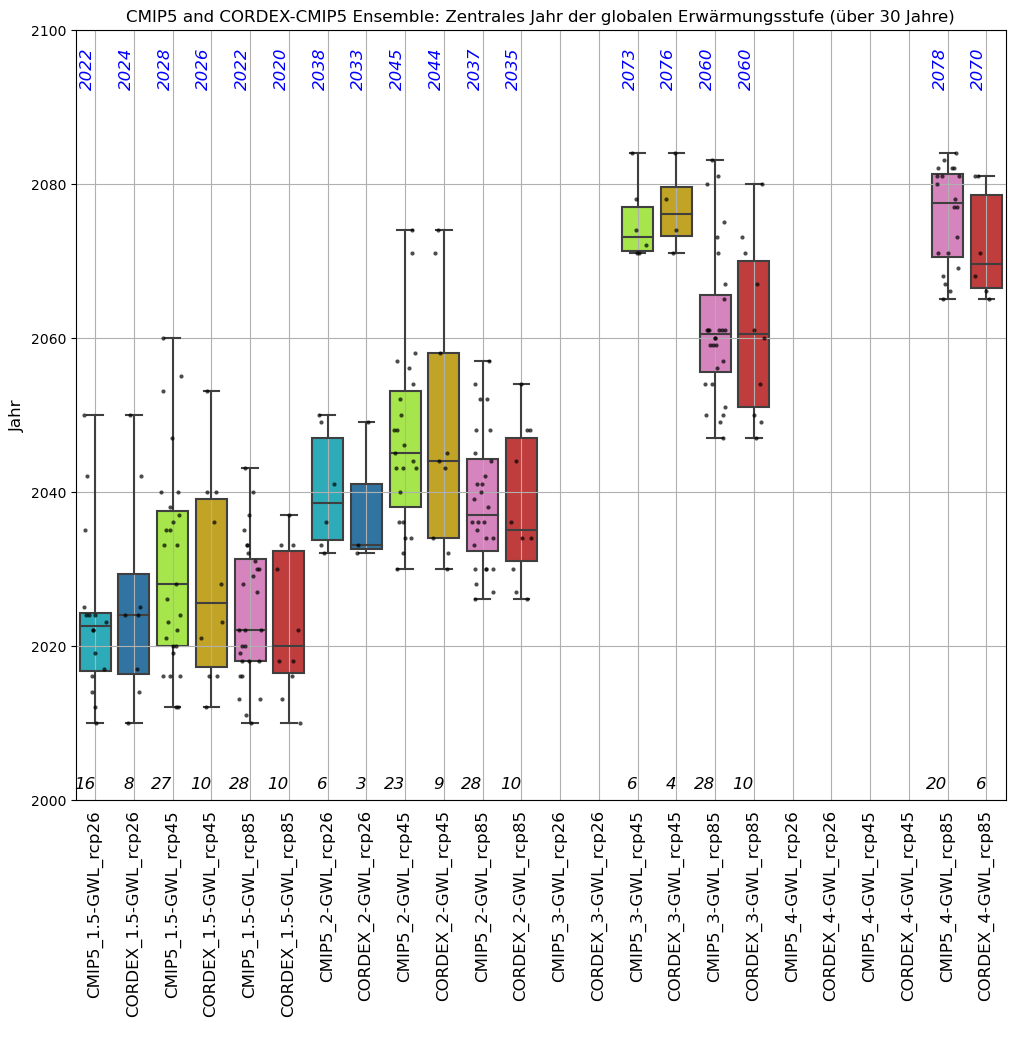

In [19]:
# Fürs plotten zusammenführen der data frames

df_all = pd.concat([df_cordex, df_cmip5])
# df_all.reset_index()

# set 9999. to nan
df_all = df_all.replace(9999.0, np.NaN)
df_allc = df_all[df_all["year"].notna()]

# doch noch spalte für rcp für die Farbe
tmp2 = df_allc["ens_GWL_RCP"].str.split("_")
df_allc["scenario"] = tmp2.str[2]
df_allc["ens_scenario"] = tmp2.str[0] + "_" + tmp2.str[2]

# dann plotten
plot_gwl_years(df_allc)

In [14]:
# testing:
# df_allc['ens_GWL_RCP']
median_txt = df_allc.groupby("ens_GWL_RCP")["year"].median()
# df.groupby('A')['B'].mean()
median_txt_int = median_txt.round().astype(int)

# mean_txt_int['CMIP5_2-GWL_rcp26']
Anzahl = df_allc.groupby("ens_GWL_RCP")["model_run"].count()
Anzahl

ens_GWL_RCP
CMIP5_1.5-GWL_rcp26     16
CMIP5_1.5-GWL_rcp45     27
CMIP5_1.5-GWL_rcp85     28
CMIP5_2-GWL_rcp26        6
CMIP5_2-GWL_rcp45       23
CMIP5_2-GWL_rcp85       28
CMIP5_3-GWL_rcp45        6
CMIP5_3-GWL_rcp85       28
CMIP5_4-GWL_rcp85       20
CORDEX_1.5-GWL_rcp26     8
CORDEX_1.5-GWL_rcp45    10
CORDEX_1.5-GWL_rcp85    10
CORDEX_2-GWL_rcp26       3
CORDEX_2-GWL_rcp45       9
CORDEX_2-GWL_rcp85      10
CORDEX_3-GWL_rcp45       4
CORDEX_3-GWL_rcp85      10
CORDEX_4-GWL_rcp85       6
Name: model_run, dtype: int64